<a href="https://colab.research.google.com/github/ClauBenitez/datasciencestest/blob/main/DataSciencetestCLBenitez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Entrega1 - Visualizaciones en Python  
### Abstract  

El presente proyecto tiene como objetivo analizar las características fisicoquímicas de los vinos tintos y blancos
utilizando los datasets *Wine Quality* disponibles en UCI Machine Learning Repository. Dichos datasets contienen
diferentes mediciones químicas (como acidez, densidad, pH, alcohol, etc.) y una calificación de calidad sensorial
asignada por catadores expertos.  

El análisis se centrará en explorar cómo las variables fisicoquímicas influyen en la calidad del vino, así como en
identificar posibles patrones diferenciadores entre vinos tintos y blancos. Se abordará la limpieza de datos, la
detección de valores faltantes y la generación de visualizaciones univariadas, bivariadas y multivariadas que
permitan dar respuesta a las preguntas e hipótesis planteadas.  

La importancia del estudio radica en comprender qué características químicas son más determinantes para la
percepción de la calidad. Esto podría ser útil no solo en la industria enológica, sino también en el diseño de
sistemas de recomendación y control de calidad automatizado. Asimismo, el análisis permite poner en práctica
técnicas de visualización y análisis exploratorio de datos en Python, fundamentales en el campo de la ciencia de
datos.  

En conclusión, este proyecto busca aportar una visión clara y cuantitativa acerca de las propiedades que inciden en
la calidad del vino, contrastando los comportamientos en vinos tintos y blancos y ofreciendo un diagnóstico visual
y numérico que siente las bases para futuros modelos predictivos.  



# Preguntas e Hipótesis de Interés  

1. ¿Qué diferencias se observan entre las distribuciones de variables fisicoquímicas en vinos tintos y blancos?  
   - Hipótesis: El vino blanco presenta mayor nivel de acidez y menor contenido de alcohol promedio que el tinto.  

2. ¿Qué variables se relacionan más fuertemente con la calidad del vino?  
   - Hipótesis: El nivel de alcohol y la acidez volátil tienen una fuerte relación con la calidad.  

3. ¿Existen combinaciones de variables que permitan discriminar vinos de mayor o menor calidad?  
   - Hipótesis: Una combinación de alta graduación alcohólica y baja acidez volátil está asociada a vinos de calidad superior.  

4. ¿Los vinos tintos presentan una dispersión mayor en la calidad respecto a los vinos blancos?  
   - Hipótesis: Los vinos tintos presentan mayor variabilidad en las calificaciones de calidad.  


In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


Importar Bases de Datos cargadas en Github


In [20]:

# Cargar datasets desde la fuente indicada
red_wine = pd.read_csv("https://raw.githubusercontent.com/ClauBenitez/datasciencestest/refs/heads/main/winequality-red.csv", sep=";")
white_wine = pd.read_csv("https://raw.githubusercontent.com/ClauBenitez/datasciencestest/refs/heads/main/winequality-white.csv", sep=";")

# Agregar columna para diferenciar tipo de vino
red_wine["type"] = "red"
white_wine["type"] = "white"

# Combinar datasets
wine = pd.concat([red_wine, white_wine], axis=0).reset_index(drop=True)

wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Resumen

In [21]:

# Resumen de datos
wine.info()

# Descripción estadística
wine.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Verificar valores nulos

In [22]:

# Valores nulos
wine.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Distribucion de la calidad de vino

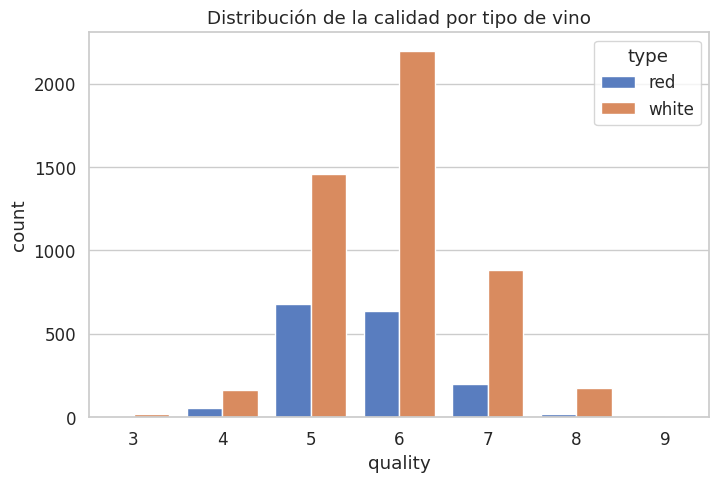

In [23]:

# Distribución de la calidad por tipo de vino
plt.figure(figsize=(8,5))
sns.countplot(data=wine, x="quality", hue="type")
plt.title("Distribución de la calidad por tipo de vino")
plt.show()


Matriz de correlaciones entre variables

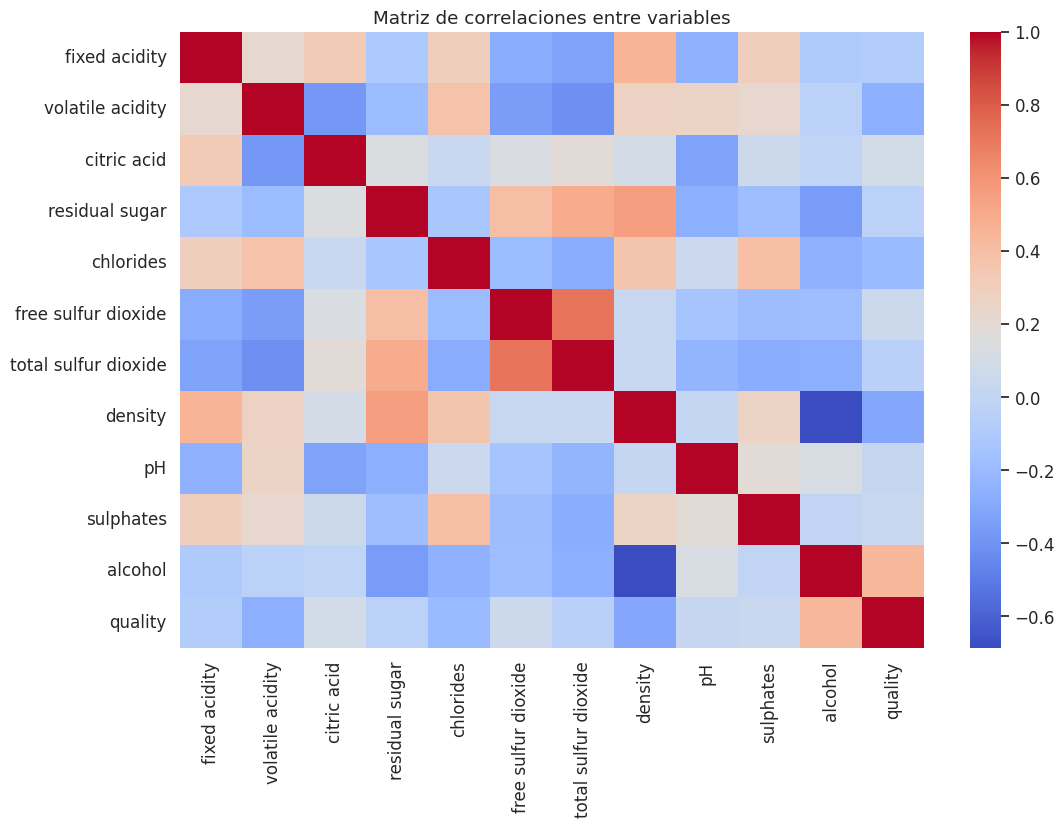

In [25]:

plt.figure(figsize=(12,8))
corr = wine.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=False, cbar=True)
plt.title("Matriz de correlaciones entre variables")
plt.show()


Relacion entre calidad y Alcohol

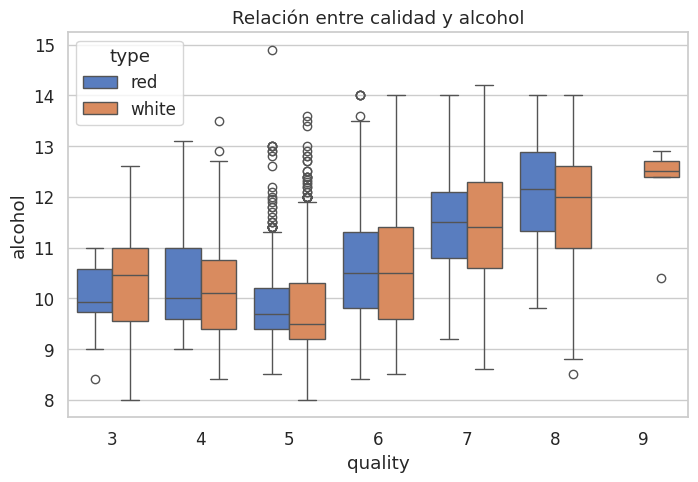

In [24]:

plt.figure(figsize=(8,5))
sns.boxplot(data=wine, x="quality", y="alcohol", hue="type")
plt.title("Relación entre calidad y alcohol")
plt.show()
